In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import *
import math
import matplotlib as mpl

In [2]:
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
simulator = Aer.get_backend('qasm_simulator')

#Setting up circuit
q0 = QuantumRegister(3)
c0 = ClassicalRegister(3)
circ = QuantumCircuit(q0, c0)

In [3]:
#Find state vector of an arbitrary circuit
def findState(circuit):
    job = execute(circuit, backend)
    result = job.result()
    #counts = result.get_counts(circuit)
    psi = result.get_statevector(circuit)
    return psi
    #plot_state_city(psi)

[0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j]
{'011': 4965, '100': 5035}


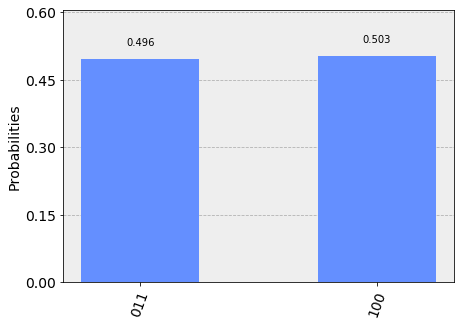

In [4]:
#Applying gates to each qubit
circ.h(0)
circ.cx(q0[0], q0[1])
circ.x(2)
circ.cx(q0[0], q0[2])

print(findState(circ))
#Measuring the qubit states and running 10000 shots
circ.measure(q0, c0)
job = execute(circ, backend = Aer.get_backend('qasm_simulator'), shots = 10000)
counts = job.result().get_counts(circ)

print(counts)
plot_histogram(counts)

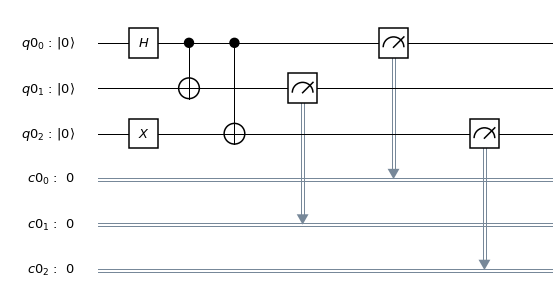

In [5]:
circ.draw(output='mpl')